In [1]:
from tqdm import tqdm
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다
pd.set_option('display.max_columns', None) # 모든 열 출력
pd.set_option('display.max_rows', None)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
taas = pd.read_csv('data/taas/taas_modeling.csv', encoding='cp949')

In [3]:
taas.head(1)

,사고번호,가해운전자 차종,EPDO,이륜차,인구,기온,강수량,풍속,grid_id,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수,사고일시_새벽,사고일시_오후,사고일시_저녁,사고일시_점심,사고일시_출근,사고일시_퇴근,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사고유형_차대사람,사고유형_차대차,사고유형_차량단독,법규위반_과속,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행,법규위반_중앙선침범,법규위반_직진우회전진행방해,법규위반_차로위반,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,도로형태_교차로 - 교차로부근,도로형태_교차로 - 교차로안,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장,가해운전자 연령_노년,가해운전자 연령_장년,가해운전자 연령_중년,가해운전자 연령_청년,가해운전자 연령_청소년
0,2019010100100002,이륜,3,15623.0,404049.0,-5.5,0.0,1.0,1980515.0,0.0,0.0,23.0,0.0,0.0,2.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
taas.shape

(61404, 66)

In [5]:
taas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61404 entries, 0 to 61403
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고번호                  61404 non-null  int64  
 1   가해운전자 차종              61404 non-null  object 
 2   EPDO                  61404 non-null  int64  
 3   이륜차                   61404 non-null  float64
 4   인구                    61404 non-null  float64
 5   기온                    61404 non-null  float64
 6   강수량                   61404 non-null  float64
 7   풍속                    61404 non-null  float64
 8   grid_id               61404 non-null  float64
 9   단속카메라수                61404 non-null  float64
 10  스쿨존수                  61404 non-null  float64
 11  음식점수                  61404 non-null  float64
 12  유흥주점수                 61404 non-null  float64
 13  단란주점수                 61404 non-null  float64
 14  교차로수                  61404 non-null  float64
 15  버스정류장수             

### Scaling

In [6]:
taas.columns

Index(['사고번호', '가해운전자 차종', 'EPDO', '이륜차', '인구', '기온', '강수량', '풍속', 'grid_id',
       '단속카메라수', '스쿨존수', '음식점수', '유흥주점수', '단란주점수', '교차로수', '버스정류장수', '사고일시_새벽',
       '사고일시_오후', '사고일시_저녁', '사고일시_점심', '사고일시_출근', '사고일시_퇴근', '요일_금요일',
       '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일', '사고유형_차대사람',
       '사고유형_차대차', '사고유형_차량단독', '법규위반_과속', '법규위반_교차로운행방법위반', '법규위반_기타',
       '법규위반_보행자보호의무위반', '법규위반_불법유턴', '법규위반_신호위반', '법규위반_안전거리미확보',
       '법규위반_안전운전불이행', '법규위반_중앙선침범', '법규위반_직진우회전진행방해', '법규위반_차로위반', '노면상태_건조',
       '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설', '노면상태_젖음/습기', '노면상태_침수', '노면상태_해빙',
       '도로형태_교차로 - 교차로부근', '도로형태_교차로 - 교차로안', '도로형태_교차로 - 교차로횡단보도내',
       '도로형태_기타 - 기타', '도로형태_단일로 - 고가도로위', '도로형태_단일로 - 교량', '도로형태_단일로 - 기타',
       '도로형태_단일로 - 지하차도(도로)내', '도로형태_단일로 - 터널', '도로형태_미분류 - 미분류',
       '도로형태_주차장 - 주차장', '가해운전자 연령_노년', '가해운전자 연령_장년', '가해운전자 연령_중년',
       '가해운전자 연령_청년', '가해운전자 연령_청소년'],
      dtype='object')

In [7]:
X = taas.drop('EPDO', axis=1)
y = taas['EPDO']

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
train_X.shape

(49123, 65)

In [10]:
test_X.shape

(12281, 65)

In [11]:
train_X.head()

,사고번호,가해운전자 차종,이륜차,인구,기온,강수량,풍속,grid_id,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수,사고일시_새벽,사고일시_오후,사고일시_저녁,사고일시_점심,사고일시_출근,사고일시_퇴근,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사고유형_차대사람,사고유형_차대차,사고유형_차량단독,법규위반_과속,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행,법규위반_중앙선침범,법규위반_직진우회전진행방해,법규위반_차로위반,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,도로형태_교차로 - 교차로부근,도로형태_교차로 - 교차로안,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장,가해운전자 연령_노년,가해운전자 연령_장년,가해운전자 연령_중년,가해운전자 연령_청년,가해운전자 연령_청소년
57087,2020110500100025,이륜,14526.0,427684.0,4.3,0.0,0.7,1990459.0,2.0,0.0,11.0,0.0,0.0,6.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59182,2019082400100573,승용,25328.0,155511.0,23.2,0.0,0.7,4182038.0,0.0,0.0,35.0,5.0,7.0,4.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
29830,2020073100100453,이륜,6487.0,175799.0,27.0,0.0,1.7,4064340.0,0.0,0.0,32.0,0.0,1.0,4.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44166,2019081600100444,승용,11559.0,424947.0,31.8,0.0,1.1,3550703.0,0.0,0.0,15.0,8.0,0.0,1.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27591,2019100900100357,화물,8660.0,272532.0,22.4,0.0,2.8,3981095.0,0.0,0.0,12.0,5.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
test_X.head()

,사고번호,가해운전자 차종,이륜차,인구,기온,강수량,풍속,grid_id,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수,사고일시_새벽,사고일시_오후,사고일시_저녁,사고일시_점심,사고일시_출근,사고일시_퇴근,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사고유형_차대사람,사고유형_차대차,사고유형_차량단독,법규위반_과속,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행,법규위반_중앙선침범,법규위반_직진우회전진행방해,법규위반_차로위반,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,도로형태_교차로 - 교차로부근,도로형태_교차로 - 교차로안,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장,가해운전자 연령_노년,가해운전자 연령_장년,가해운전자 연령_중년,가해운전자 연령_청년,가해운전자 연령_청소년
39690,2020082100100401,화물,23872.0,1317340.0,29.8,0.0,2.6,1934123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
33777,2019012900100520,화물,6424.0,349868.0,3.4,0.0,0.9,2484006.0,0.0,0.0,119.0,0.0,0.0,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
280,2019011700100405,이륜,15956.0,406889.0,1.6,0.0,2.9,2143470.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
48457,2021010900100455,승용,11950.0,262451.0,-7.5,0.0,4.3,3425837.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
54116,2021050200100343,화물,12912.0,531031.0,15.3,0.0,3.8,1774132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
train_X_new = train_X.drop(['이륜차', '인구', '기온', '강수량', '풍속', '단속카메라수', '스쿨존수', '음식점수', '유흥주점수', '단란주점수', '교차로수', '버스정류장수'], axis=1)
test_X_new = test_X.drop(['이륜차', '인구', '기온', '강수량', '풍속', '단속카메라수', '스쿨존수', '음식점수', '유흥주점수', '단란주점수', '교차로수', '버스정류장수'], axis=1)

In [14]:
train_X_new_cont = train_X[['이륜차', '인구', '기온', '강수량', '풍속', '단속카메라수', '스쿨존수', '음식점수', '유흥주점수', '단란주점수', '교차로수', '버스정류장수']]
test_X_new_cont = test_X[['이륜차', '인구', '기온', '강수량', '풍속', '단속카메라수', '스쿨존수', '음식점수', '유흥주점수', '단란주점수', '교차로수', '버스정류장수']]

In [15]:
train_X_new_cont.head()

,이륜차,인구,기온,강수량,풍속,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수
57087,14526.0,427684.0,4.3,0.0,0.7,2.0,0.0,11.0,0.0,0.0,6.0,0.0
59182,25328.0,155511.0,23.2,0.0,0.7,0.0,0.0,35.0,5.0,7.0,4.0,0.0
29830,6487.0,175799.0,27.0,0.0,1.7,0.0,0.0,32.0,0.0,1.0,4.0,0.0
44166,11559.0,424947.0,31.8,0.0,1.1,0.0,0.0,15.0,8.0,0.0,1.0,2.0
27591,8660.0,272532.0,22.4,0.0,2.8,0.0,0.0,12.0,5.0,2.0,0.0,0.0


In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

train_X_new_cont_rbs = scaler.fit_transform(train_X_new_cont)
train_X_new_cont_rbs = pd.DataFrame(train_X_new_cont_rbs, columns=train_X_new_cont.columns)

test_X_new_cont_rbs = scaler.transform(test_X_new_cont)
test_X_new_cont_rbs = pd.DataFrame(test_X_new_cont_rbs, columns=test_X_new_cont.columns)

In [17]:
train_X_new_cont_rbs.head()

,이륜차,인구,기온,강수량,풍속,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수
0,-0.034003,0.260688,-0.794872,0.0,-0.888889,2.0,0.0,0.190476,0.0,0.0,2.5,-0.333333
1,1.024498,-0.968689,0.416667,0.0,-0.888889,0.0,0.0,1.333333,5.0,7.0,1.5,-0.333333
2,-0.821754,-0.877050,0.660256,0.0,-0.333333,0.0,0.0,1.190476,0.0,1.0,1.5,-0.333333
3,-0.324743,0.248325,0.967949,0.0,-0.666667,0.0,0.0,0.380952,8.0,0.0,0.0,0.333333
4,-0.608819,-0.440117,0.365385,0.0,0.277778,0.0,0.0,0.238095,5.0,2.0,-0.5,-0.333333


In [18]:
test_X_new_cont_rbs.head()

,이륜차,인구,기온,강수량,풍속,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수
0,0.881823,4.279171,0.839744,0.0,0.166667,0.0,0.0,-0.333333,0.0,0.0,-0.5,-0.333333
1,-0.827927,-0.090799,-0.852564,0.0,-0.777778,0.0,0.0,5.333333,0.0,0.0,1.5,-0.333333
2,0.106124,0.166759,-0.967949,0.0,0.333333,0.0,0.0,-0.333333,0.0,0.0,-0.5,0.333333
3,-0.286428,-0.485652,-1.551282,0.0,1.111111,0.0,0.0,-0.238095,0.0,0.0,0.0,-0.333333
4,-0.192161,0.727496,-0.089744,0.0,0.833333,0.0,0.0,-0.333333,0.0,0.0,-0.5,-0.333333


In [19]:
train_X_new_cont_rbs.reset_index(drop=True, inplace=True)
train_X_new.reset_index(drop=True, inplace=True)
test_X_new_cont_rbs.reset_index(drop=True, inplace=True)
test_X_new.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [20]:
train_X = pd.concat([train_X_new_cont_rbs, train_X_new], axis=1)
test_X = pd.concat([test_X_new_cont_rbs, test_X_new], axis=1)

In [21]:
train_X_new_cont_rbs.shape, train_X_new.shape, train_X.shape

((49123, 12), (49123, 53), (49123, 65))

In [22]:
test_X_new_cont_rbs.shape, test_X_new.shape, test_X.shape

((12281, 12), (12281, 53), (12281, 65))

In [23]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((49123, 65), (12281, 65), (49123,), (12281,))

In [24]:
train_X_1 = train_X.copy()
test_X_1 = test_X.copy()

In [25]:
train_X_1.head()

,이륜차,인구,기온,강수량,풍속,단속카메라수,스쿨존수,음식점수,유흥주점수,단란주점수,교차로수,버스정류장수,사고번호,가해운전자 차종,grid_id,사고일시_새벽,사고일시_오후,사고일시_저녁,사고일시_점심,사고일시_출근,사고일시_퇴근,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사고유형_차대사람,사고유형_차대차,사고유형_차량단독,법규위반_과속,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행,법규위반_중앙선침범,법규위반_직진우회전진행방해,법규위반_차로위반,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,도로형태_교차로 - 교차로부근,도로형태_교차로 - 교차로안,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장,가해운전자 연령_노년,가해운전자 연령_장년,가해운전자 연령_중년,가해운전자 연령_청년,가해운전자 연령_청소년
0,-0.034003,0.260688,-0.794872,0.0,-0.888889,2.0,0.0,0.190476,0.0,0.0,2.5,-0.333333,2020110500100025,이륜,1990459.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.024498,-0.968689,0.416667,0.0,-0.888889,0.0,0.0,1.333333,5.0,7.0,1.5,-0.333333,2019082400100573,승용,4182038.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.821754,-0.877050,0.660256,0.0,-0.333333,0.0,0.0,1.190476,0.0,1.0,1.5,-0.333333,2020073100100453,이륜,4064340.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.324743,0.248325,0.967949,0.0,-0.666667,0.0,0.0,0.380952,8.0,0.0,0.0,0.333333,2019081600100444,승용,3550703.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.608819,-0.440117,0.365385,0.0,0.277778,0.0,0.0,0.238095,5.0,2.0,-0.5,-0.333333,2019100900100357,화물,3981095.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
train_X = train_X.drop(['사고번호','가해운전자 차종','grid_id'], axis=1)
test_X = test_X.drop(['사고번호','가해운전자 차종','grid_id'], axis=1)

### 모델링

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

### RandomForest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(train_X, train_y)

print(f"RMSE for RandomForest : {round(mean_squared_error(test_y, rf.predict(test_X))**0.5,3)}")
print(f"RMSLE for RandomForest : {round(mean_squared_log_error(test_y, rf.predict(test_X))**0.5,3)}")

RMSE for RandomForest : 2.31
RMSLE for RandomForest : 0.409


#### RandomForest Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [30]:
rf = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)
rf.fit(train_X, train_y)

print(f"RMSE for RandomForest : {round(mean_squared_error(test_y, rf.predict(test_X))**0.5,3)}")
print(f"RMSLE for RandomForest : {round(mean_squared_log_error(test_y, rf.predict(test_X))**0.5,3)}")

RMSE for RandomForest : 2.264
RMSLE for RandomForest : 0.398


### LightGBM

In [31]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(train_X, train_y)

print(f"RMSE for LightGBM : {round(mean_squared_error(test_y, lgbm.predict(test_X))**0.5,3)}")
print(f"RMSLE for LightGBM : {round(mean_squared_log_error(test_y, lgbm.predict(test_X))**0.5,3)}")

RMSE for LightGBM : 2.264
RMSLE for LightGBM : 0.398


#### LightGBM Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 10}


In [33]:
lgbm = LGBMRegressor(learning_rate=0.01, n_estimators=1000, num_leaves=10, random_state=42)
lgbm.fit(train_X, train_y)

print(f"RMSE for LightGBM : {round(mean_squared_error(test_y, lgbm.predict(test_X))**0.5,3)}")
print(f"RMSLE for LightGBM : {round(mean_squared_log_error(test_y, lgbm.predict(test_X))**0.5,3)}")

RMSE for LightGBM : 2.258
RMSLE for LightGBM : 0.397


### XGBoost

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(train_X, train_y)

print(f"RMSE for XGBoost : {round(mean_squared_error(test_y, xgb.predict(test_X))**0.5,3)}")
print(f"RMSLE for XGBoost : {round(mean_squared_log_error(test_y, xgb.predict(test_X))**0.5,3)}")

C:\Users\jwshi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\jwshi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RMSE for XGBoost : 2.302
RMSLE for XGBoost : 0.403


#### XGBoost Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

C:\Users\jwshi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [36]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb.fit(train_X, train_y)

print(f"RMSE for XGBoost : {round(mean_squared_error(test_y, xgb.predict(test_X))**0.5,3)}")
print(f"RMSLE for XGBoost : {round(mean_squared_log_error(test_y, xgb.predict(test_X))**0.5,3)}")

RMSE for XGBoost : 2.259
RMSLE for XGBoost : 0.397


### CatBoost

In [37]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(random_state=42)
cb.fit(train_X, train_y)

print(f"RMSE for CatBoost : {round(mean_squared_error(test_y, cb.predict(test_X))**0.5,3)}")
print(f"RMSLE for CatBoost : {round(mean_squared_log_error(test_y, cb.predict(test_X))**0.5,3)}")

Learning rate set to 0.075753
0:	learn: 2.3170879	total: 154ms	remaining: 2m 33s
1:	learn: 2.3136750	total: 159ms	remaining: 1m 19s
2:	learn: 2.3109703	total: 163ms	remaining: 54.3s
3:	learn: 2.3083490	total: 169ms	remaining: 42s
4:	learn: 2.3060786	total: 175ms	remaining: 34.8s
5:	learn: 2.3042131	total: 180ms	remaining: 29.8s
6:	learn: 2.3023373	total: 187ms	remaining: 26.5s
7:	learn: 2.3006588	total: 193ms	remaining: 23.9s
8:	learn: 2.2989918	total: 198ms	remaining: 21.8s
9:	learn: 2.2975625	total: 204ms	remaining: 20.2s
10:	learn: 2.2963262	total: 210ms	remaining: 18.9s
11:	learn: 2.2953424	total: 216ms	remaining: 17.8s
12:	learn: 2.2943741	total: 221ms	remaining: 16.8s
13:	learn: 2.2931350	total: 227ms	remaining: 16s
14:	learn: 2.2922583	total: 232ms	remaining: 15.2s
15:	learn: 2.2913661	total: 238ms	remaining: 14.6s
16:	learn: 2.2905058	total: 243ms	remaining: 14.1s
17:	learn: 2.2898828	total: 248ms	remaining: 13.6s
18:	learn: 2.2890214	total: 254ms	remaining: 13.1s
19:	learn: 2.

184:	learn: 2.2431503	total: 1.24s	remaining: 5.45s
185:	learn: 2.2428569	total: 1.24s	remaining: 5.45s
186:	learn: 2.2426248	total: 1.25s	remaining: 5.44s
187:	learn: 2.2423346	total: 1.26s	remaining: 5.43s
188:	learn: 2.2419001	total: 1.26s	remaining: 5.43s
189:	learn: 2.2418126	total: 1.27s	remaining: 5.42s
190:	learn: 2.2416005	total: 1.28s	remaining: 5.41s
191:	learn: 2.2412984	total: 1.28s	remaining: 5.4s
192:	learn: 2.2410680	total: 1.29s	remaining: 5.39s
193:	learn: 2.2408425	total: 1.29s	remaining: 5.38s
194:	learn: 2.2402499	total: 1.3s	remaining: 5.37s
195:	learn: 2.2400927	total: 1.31s	remaining: 5.36s
196:	learn: 2.2398076	total: 1.31s	remaining: 5.35s
197:	learn: 2.2396434	total: 1.32s	remaining: 5.34s
198:	learn: 2.2394574	total: 1.32s	remaining: 5.33s
199:	learn: 2.2392410	total: 1.33s	remaining: 5.32s
200:	learn: 2.2389691	total: 1.33s	remaining: 5.31s
201:	learn: 2.2387958	total: 1.34s	remaining: 5.29s
202:	learn: 2.2385969	total: 1.35s	remaining: 5.29s
203:	learn: 2.

370:	learn: 2.2042770	total: 2.31s	remaining: 3.92s
371:	learn: 2.2040328	total: 2.32s	remaining: 3.91s
372:	learn: 2.2038084	total: 2.32s	remaining: 3.9s
373:	learn: 2.2037389	total: 2.33s	remaining: 3.9s
374:	learn: 2.2035695	total: 2.33s	remaining: 3.89s
375:	learn: 2.2034823	total: 2.34s	remaining: 3.88s
376:	learn: 2.2033841	total: 2.34s	remaining: 3.87s
377:	learn: 2.2031925	total: 2.35s	remaining: 3.87s
378:	learn: 2.2029758	total: 2.35s	remaining: 3.86s
379:	learn: 2.2026467	total: 2.36s	remaining: 3.85s
380:	learn: 2.2025630	total: 2.37s	remaining: 3.85s
381:	learn: 2.2023823	total: 2.37s	remaining: 3.84s
382:	learn: 2.2017322	total: 2.38s	remaining: 3.83s
383:	learn: 2.2016451	total: 2.38s	remaining: 3.82s
384:	learn: 2.2013361	total: 2.39s	remaining: 3.82s
385:	learn: 2.2012621	total: 2.4s	remaining: 3.81s
386:	learn: 2.2011931	total: 2.4s	remaining: 3.8s
387:	learn: 2.2009936	total: 2.4s	remaining: 3.79s
388:	learn: 2.2008460	total: 2.41s	remaining: 3.79s
389:	learn: 2.2007

547:	learn: 2.1746452	total: 3.37s	remaining: 2.78s
548:	learn: 2.1744754	total: 3.38s	remaining: 2.78s
549:	learn: 2.1743019	total: 3.39s	remaining: 2.77s
550:	learn: 2.1742209	total: 3.39s	remaining: 2.76s
551:	learn: 2.1740648	total: 3.4s	remaining: 2.76s
552:	learn: 2.1739327	total: 3.4s	remaining: 2.75s
553:	learn: 2.1737998	total: 3.41s	remaining: 2.75s
554:	learn: 2.1733336	total: 3.42s	remaining: 2.74s
555:	learn: 2.1731909	total: 3.42s	remaining: 2.73s
556:	learn: 2.1731019	total: 3.43s	remaining: 2.73s
557:	learn: 2.1729302	total: 3.43s	remaining: 2.72s
558:	learn: 2.1724889	total: 3.44s	remaining: 2.71s
559:	learn: 2.1724162	total: 3.45s	remaining: 2.71s
560:	learn: 2.1722589	total: 3.45s	remaining: 2.7s
561:	learn: 2.1719963	total: 3.46s	remaining: 2.7s
562:	learn: 2.1719256	total: 3.46s	remaining: 2.69s
563:	learn: 2.1718292	total: 3.47s	remaining: 2.68s
564:	learn: 2.1718051	total: 3.48s	remaining: 2.68s
565:	learn: 2.1715267	total: 3.48s	remaining: 2.67s
566:	learn: 2.17

724:	learn: 2.1465826	total: 4.45s	remaining: 1.69s
725:	learn: 2.1463247	total: 4.45s	remaining: 1.68s
726:	learn: 2.1461825	total: 4.46s	remaining: 1.67s
727:	learn: 2.1460422	total: 4.47s	remaining: 1.67s
728:	learn: 2.1458717	total: 4.47s	remaining: 1.66s
729:	learn: 2.1456492	total: 4.48s	remaining: 1.66s
730:	learn: 2.1453880	total: 4.49s	remaining: 1.65s
731:	learn: 2.1453090	total: 4.49s	remaining: 1.64s
732:	learn: 2.1451699	total: 4.5s	remaining: 1.64s
733:	learn: 2.1450612	total: 4.5s	remaining: 1.63s
734:	learn: 2.1449715	total: 4.51s	remaining: 1.63s
735:	learn: 2.1448130	total: 4.51s	remaining: 1.62s
736:	learn: 2.1445711	total: 4.52s	remaining: 1.61s
737:	learn: 2.1444981	total: 4.53s	remaining: 1.61s
738:	learn: 2.1443908	total: 4.53s	remaining: 1.6s
739:	learn: 2.1441865	total: 4.54s	remaining: 1.59s
740:	learn: 2.1439771	total: 4.54s	remaining: 1.59s
741:	learn: 2.1438535	total: 4.55s	remaining: 1.58s
742:	learn: 2.1436486	total: 4.56s	remaining: 1.58s
743:	learn: 2.1

900:	learn: 2.1214977	total: 5.51s	remaining: 606ms
901:	learn: 2.1214503	total: 5.52s	remaining: 600ms
902:	learn: 2.1212981	total: 5.53s	remaining: 594ms
903:	learn: 2.1211676	total: 5.54s	remaining: 588ms
904:	learn: 2.1210095	total: 5.54s	remaining: 582ms
905:	learn: 2.1209426	total: 5.55s	remaining: 576ms
906:	learn: 2.1208582	total: 5.55s	remaining: 569ms
907:	learn: 2.1207621	total: 5.56s	remaining: 563ms
908:	learn: 2.1207196	total: 5.56s	remaining: 557ms
909:	learn: 2.1206774	total: 5.57s	remaining: 551ms
910:	learn: 2.1205314	total: 5.58s	remaining: 545ms
911:	learn: 2.1204063	total: 5.58s	remaining: 539ms
912:	learn: 2.1201850	total: 5.59s	remaining: 533ms
913:	learn: 2.1200634	total: 5.59s	remaining: 526ms
914:	learn: 2.1199733	total: 5.6s	remaining: 520ms
915:	learn: 2.1198246	total: 5.61s	remaining: 514ms
916:	learn: 2.1197507	total: 5.61s	remaining: 508ms
917:	learn: 2.1195884	total: 5.62s	remaining: 502ms
918:	learn: 2.1195384	total: 5.62s	remaining: 496ms
919:	learn: 2

#### CatBoost Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
cb = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb = GridSearchCV(cb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb.fit(train_X, train_y)

# Print the best parameters and the best score
print("Best parameters for CatBoost:", grid_search_cb.best_params_)

C:\Users\jwshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 2339, in _fit
 

0:	learn: 2.3204415	total: 8.81ms	remaining: 8.8s
1:	learn: 2.3198740	total: 16.4ms	remaining: 8.16s
2:	learn: 2.3193946	total: 23.6ms	remaining: 7.85s
3:	learn: 2.3188244	total: 31ms	remaining: 7.72s
4:	learn: 2.3183279	total: 39.4ms	remaining: 7.85s
5:	learn: 2.3178370	total: 47.5ms	remaining: 7.87s
6:	learn: 2.3173131	total: 56.1ms	remaining: 7.96s
7:	learn: 2.3167827	total: 64.8ms	remaining: 8.04s
8:	learn: 2.3162980	total: 73.1ms	remaining: 8.04s
9:	learn: 2.3158274	total: 81.2ms	remaining: 8.04s
10:	learn: 2.3153636	total: 89.3ms	remaining: 8.03s
11:	learn: 2.3148802	total: 97ms	remaining: 7.99s
12:	learn: 2.3144754	total: 104ms	remaining: 7.93s
13:	learn: 2.3141447	total: 110ms	remaining: 7.71s
14:	learn: 2.3136898	total: 117ms	remaining: 7.71s
15:	learn: 2.3132277	total: 125ms	remaining: 7.68s
16:	learn: 2.3127833	total: 132ms	remaining: 7.65s
17:	learn: 2.3123856	total: 139ms	remaining: 7.58s
18:	learn: 2.3119600	total: 146ms	remaining: 7.53s
19:	learn: 2.3115630	total: 153ms	

169:	learn: 2.2833847	total: 1.26s	remaining: 6.17s
170:	learn: 2.2833095	total: 1.27s	remaining: 6.17s
171:	learn: 2.2832181	total: 1.28s	remaining: 6.16s
172:	learn: 2.2831040	total: 1.29s	remaining: 6.15s
173:	learn: 2.2830290	total: 1.29s	remaining: 6.14s
174:	learn: 2.2829268	total: 1.3s	remaining: 6.14s
175:	learn: 2.2828311	total: 1.31s	remaining: 6.13s
176:	learn: 2.2827335	total: 1.31s	remaining: 6.12s
177:	learn: 2.2826150	total: 1.32s	remaining: 6.11s
178:	learn: 2.2825178	total: 1.33s	remaining: 6.1s
179:	learn: 2.2824103	total: 1.34s	remaining: 6.09s
180:	learn: 2.2823034	total: 1.34s	remaining: 6.08s
181:	learn: 2.2821991	total: 1.35s	remaining: 6.08s
182:	learn: 2.2820818	total: 1.36s	remaining: 6.07s
183:	learn: 2.2820022	total: 1.36s	remaining: 6.06s
184:	learn: 2.2818975	total: 1.37s	remaining: 6.05s
185:	learn: 2.2818183	total: 1.38s	remaining: 6.04s
186:	learn: 2.2817324	total: 1.39s	remaining: 6.03s
187:	learn: 2.2816492	total: 1.39s	remaining: 6.02s
188:	learn: 2.

343:	learn: 2.2703381	total: 2.51s	remaining: 4.79s
344:	learn: 2.2702616	total: 2.52s	remaining: 4.79s
345:	learn: 2.2701950	total: 2.53s	remaining: 4.78s
346:	learn: 2.2701168	total: 2.54s	remaining: 4.77s
347:	learn: 2.2700659	total: 2.54s	remaining: 4.77s
348:	learn: 2.2700072	total: 2.55s	remaining: 4.76s
349:	learn: 2.2699423	total: 2.56s	remaining: 4.75s
350:	learn: 2.2699099	total: 2.56s	remaining: 4.74s
351:	learn: 2.2698536	total: 2.57s	remaining: 4.74s
352:	learn: 2.2697993	total: 2.58s	remaining: 4.73s
353:	learn: 2.2697540	total: 2.59s	remaining: 4.72s
354:	learn: 2.2697259	total: 2.59s	remaining: 4.71s
355:	learn: 2.2696815	total: 2.6s	remaining: 4.71s
356:	learn: 2.2696423	total: 2.61s	remaining: 4.7s
357:	learn: 2.2695889	total: 2.62s	remaining: 4.7s
358:	learn: 2.2694844	total: 2.63s	remaining: 4.69s
359:	learn: 2.2694465	total: 2.63s	remaining: 4.68s
360:	learn: 2.2693676	total: 2.64s	remaining: 4.67s
361:	learn: 2.2692993	total: 2.65s	remaining: 4.66s
362:	learn: 2.2

521:	learn: 2.2610176	total: 3.77s	remaining: 3.45s
522:	learn: 2.2609654	total: 3.77s	remaining: 3.44s
523:	learn: 2.2609090	total: 3.78s	remaining: 3.44s
524:	learn: 2.2608607	total: 3.79s	remaining: 3.43s
525:	learn: 2.2607966	total: 3.8s	remaining: 3.42s
526:	learn: 2.2607727	total: 3.8s	remaining: 3.41s
527:	learn: 2.2606826	total: 3.81s	remaining: 3.4s
528:	learn: 2.2606414	total: 3.82s	remaining: 3.4s
529:	learn: 2.2606099	total: 3.82s	remaining: 3.39s
530:	learn: 2.2605419	total: 3.83s	remaining: 3.38s
531:	learn: 2.2605109	total: 3.83s	remaining: 3.37s
532:	learn: 2.2604584	total: 3.84s	remaining: 3.37s
533:	learn: 2.2604292	total: 3.85s	remaining: 3.36s
534:	learn: 2.2603930	total: 3.85s	remaining: 3.35s
535:	learn: 2.2603360	total: 3.86s	remaining: 3.34s
536:	learn: 2.2603005	total: 3.87s	remaining: 3.34s
537:	learn: 2.2602332	total: 3.88s	remaining: 3.33s
538:	learn: 2.2601980	total: 3.88s	remaining: 3.32s
539:	learn: 2.2601746	total: 3.89s	remaining: 3.31s
540:	learn: 2.26

699:	learn: 2.2534135	total: 5.02s	remaining: 2.15s
700:	learn: 2.2533551	total: 5.03s	remaining: 2.15s
701:	learn: 2.2533091	total: 5.04s	remaining: 2.14s
702:	learn: 2.2532355	total: 5.05s	remaining: 2.13s
703:	learn: 2.2532134	total: 5.05s	remaining: 2.13s
704:	learn: 2.2531940	total: 5.06s	remaining: 2.12s
705:	learn: 2.2531305	total: 5.07s	remaining: 2.11s
706:	learn: 2.2531015	total: 5.08s	remaining: 2.1s
707:	learn: 2.2530408	total: 5.08s	remaining: 2.1s
708:	learn: 2.2530124	total: 5.09s	remaining: 2.09s
709:	learn: 2.2529870	total: 5.1s	remaining: 2.08s
710:	learn: 2.2529648	total: 5.1s	remaining: 2.07s
711:	learn: 2.2529211	total: 5.11s	remaining: 2.07s
712:	learn: 2.2528786	total: 5.12s	remaining: 2.06s
713:	learn: 2.2527814	total: 5.12s	remaining: 2.05s
714:	learn: 2.2527357	total: 5.13s	remaining: 2.04s
715:	learn: 2.2527012	total: 5.14s	remaining: 2.04s
716:	learn: 2.2526639	total: 5.14s	remaining: 2.03s
717:	learn: 2.2526261	total: 5.15s	remaining: 2.02s
718:	learn: 2.25

879:	learn: 2.2461122	total: 6.28s	remaining: 856ms
880:	learn: 2.2460815	total: 6.29s	remaining: 849ms
881:	learn: 2.2460601	total: 6.29s	remaining: 842ms
882:	learn: 2.2460219	total: 6.3s	remaining: 835ms
883:	learn: 2.2459967	total: 6.31s	remaining: 828ms
884:	learn: 2.2459494	total: 6.31s	remaining: 821ms
885:	learn: 2.2458993	total: 6.32s	remaining: 813ms
886:	learn: 2.2458754	total: 6.33s	remaining: 806ms
887:	learn: 2.2458354	total: 6.33s	remaining: 799ms
888:	learn: 2.2457759	total: 6.34s	remaining: 792ms
889:	learn: 2.2457489	total: 6.35s	remaining: 785ms
890:	learn: 2.2456743	total: 6.36s	remaining: 778ms
891:	learn: 2.2456284	total: 6.36s	remaining: 770ms
892:	learn: 2.2456003	total: 6.37s	remaining: 763ms
893:	learn: 2.2455574	total: 6.38s	remaining: 756ms
894:	learn: 2.2454898	total: 6.38s	remaining: 749ms
895:	learn: 2.2454389	total: 6.39s	remaining: 742ms
896:	learn: 2.2454102	total: 6.4s	remaining: 735ms
897:	learn: 2.2453704	total: 6.4s	remaining: 727ms
898:	learn: 2.2

In [39]:
cb = CatBoostRegressor(depth=7, learning_rate=0.01, random_state=42)
cb.fit(train_X, train_y)

print(f"RMSE for CatBoost : {round(mean_squared_error(test_y, cb.predict(test_X))**0.5,3)}")
print(f"RMSLE for CatBoost : {round(mean_squared_log_error(test_y, cb.predict(test_X))**0.5,3)}")

0:	learn: 2.3204415	total: 7.82ms	remaining: 7.81s
1:	learn: 2.3198740	total: 15.3ms	remaining: 7.63s
2:	learn: 2.3193946	total: 23ms	remaining: 7.64s
3:	learn: 2.3188244	total: 31.3ms	remaining: 7.79s
4:	learn: 2.3183279	total: 39.8ms	remaining: 7.92s
5:	learn: 2.3178370	total: 47.1ms	remaining: 7.81s
6:	learn: 2.3173131	total: 54.7ms	remaining: 7.75s
7:	learn: 2.3167827	total: 62.6ms	remaining: 7.76s
8:	learn: 2.3162980	total: 71ms	remaining: 7.81s
9:	learn: 2.3158274	total: 78.9ms	remaining: 7.81s
10:	learn: 2.3153636	total: 87.4ms	remaining: 7.86s
11:	learn: 2.3148802	total: 96.2ms	remaining: 7.92s
12:	learn: 2.3144754	total: 104ms	remaining: 7.92s
13:	learn: 2.3141447	total: 109ms	remaining: 7.69s
14:	learn: 2.3136898	total: 117ms	remaining: 7.69s
15:	learn: 2.3132277	total: 124ms	remaining: 7.64s
16:	learn: 2.3127833	total: 132ms	remaining: 7.61s
17:	learn: 2.3123856	total: 139ms	remaining: 7.56s
18:	learn: 2.3119600	total: 145ms	remaining: 7.5s
19:	learn: 2.3115630	total: 152ms	

172:	learn: 2.2831040	total: 1.27s	remaining: 6.08s
173:	learn: 2.2830290	total: 1.28s	remaining: 6.07s
174:	learn: 2.2829268	total: 1.29s	remaining: 6.07s
175:	learn: 2.2828311	total: 1.29s	remaining: 6.06s
176:	learn: 2.2827335	total: 1.3s	remaining: 6.05s
177:	learn: 2.2826150	total: 1.31s	remaining: 6.05s
178:	learn: 2.2825178	total: 1.32s	remaining: 6.04s
179:	learn: 2.2824103	total: 1.32s	remaining: 6.03s
180:	learn: 2.2823034	total: 1.33s	remaining: 6.02s
181:	learn: 2.2821991	total: 1.34s	remaining: 6.01s
182:	learn: 2.2820818	total: 1.34s	remaining: 6s
183:	learn: 2.2820022	total: 1.35s	remaining: 5.99s
184:	learn: 2.2818975	total: 1.36s	remaining: 5.98s
185:	learn: 2.2818183	total: 1.36s	remaining: 5.97s
186:	learn: 2.2817324	total: 1.37s	remaining: 5.96s
187:	learn: 2.2816492	total: 1.38s	remaining: 5.95s
188:	learn: 2.2815697	total: 1.38s	remaining: 5.94s
189:	learn: 2.2814438	total: 1.39s	remaining: 5.93s
190:	learn: 2.2813352	total: 1.4s	remaining: 5.92s
191:	learn: 2.281

355:	learn: 2.2696815	total: 2.53s	remaining: 4.57s
356:	learn: 2.2696423	total: 2.53s	remaining: 4.57s
357:	learn: 2.2695889	total: 2.54s	remaining: 4.56s
358:	learn: 2.2694844	total: 2.55s	remaining: 4.55s
359:	learn: 2.2694465	total: 2.56s	remaining: 4.54s
360:	learn: 2.2693676	total: 2.56s	remaining: 4.54s
361:	learn: 2.2692993	total: 2.57s	remaining: 4.53s
362:	learn: 2.2692629	total: 2.58s	remaining: 4.52s
363:	learn: 2.2692148	total: 2.58s	remaining: 4.51s
364:	learn: 2.2691650	total: 2.59s	remaining: 4.51s
365:	learn: 2.2691193	total: 2.6s	remaining: 4.5s
366:	learn: 2.2690640	total: 2.6s	remaining: 4.49s
367:	learn: 2.2689946	total: 2.61s	remaining: 4.48s
368:	learn: 2.2689360	total: 2.62s	remaining: 4.47s
369:	learn: 2.2688876	total: 2.62s	remaining: 4.47s
370:	learn: 2.2688177	total: 2.63s	remaining: 4.46s
371:	learn: 2.2687868	total: 2.64s	remaining: 4.45s
372:	learn: 2.2687372	total: 2.64s	remaining: 4.44s
373:	learn: 2.2686239	total: 2.65s	remaining: 4.43s
374:	learn: 2.2

539:	learn: 2.2601746	total: 3.78s	remaining: 3.22s
540:	learn: 2.2600950	total: 3.79s	remaining: 3.21s
541:	learn: 2.2600482	total: 3.79s	remaining: 3.21s
542:	learn: 2.2599663	total: 3.8s	remaining: 3.2s
543:	learn: 2.2599365	total: 3.81s	remaining: 3.19s
544:	learn: 2.2598830	total: 3.81s	remaining: 3.18s
545:	learn: 2.2598608	total: 3.82s	remaining: 3.18s
546:	learn: 2.2598040	total: 3.83s	remaining: 3.17s
547:	learn: 2.2597728	total: 3.83s	remaining: 3.16s
548:	learn: 2.2597259	total: 3.84s	remaining: 3.15s
549:	learn: 2.2596715	total: 3.85s	remaining: 3.15s
550:	learn: 2.2596253	total: 3.85s	remaining: 3.14s
551:	learn: 2.2595958	total: 3.86s	remaining: 3.13s
552:	learn: 2.2595549	total: 3.87s	remaining: 3.13s
553:	learn: 2.2594995	total: 3.87s	remaining: 3.12s
554:	learn: 2.2594551	total: 3.88s	remaining: 3.11s
555:	learn: 2.2593976	total: 3.89s	remaining: 3.1s
556:	learn: 2.2593354	total: 3.89s	remaining: 3.1s
557:	learn: 2.2592685	total: 3.9s	remaining: 3.09s
558:	learn: 2.259

698:	learn: 2.2534362	total: 4.85s	remaining: 2.09s
699:	learn: 2.2534135	total: 4.86s	remaining: 2.08s
700:	learn: 2.2533551	total: 4.87s	remaining: 2.08s
701:	learn: 2.2533091	total: 4.87s	remaining: 2.07s
702:	learn: 2.2532355	total: 4.88s	remaining: 2.06s
703:	learn: 2.2532134	total: 4.89s	remaining: 2.05s
704:	learn: 2.2531940	total: 4.89s	remaining: 2.05s
705:	learn: 2.2531305	total: 4.9s	remaining: 2.04s
706:	learn: 2.2531015	total: 4.9s	remaining: 2.03s
707:	learn: 2.2530408	total: 4.91s	remaining: 2.02s
708:	learn: 2.2530124	total: 4.92s	remaining: 2.02s
709:	learn: 2.2529870	total: 4.92s	remaining: 2.01s
710:	learn: 2.2529648	total: 4.93s	remaining: 2s
711:	learn: 2.2529211	total: 4.94s	remaining: 2s
712:	learn: 2.2528786	total: 4.95s	remaining: 1.99s
713:	learn: 2.2527814	total: 4.95s	remaining: 1.98s
714:	learn: 2.2527357	total: 4.96s	remaining: 1.98s
715:	learn: 2.2527012	total: 4.97s	remaining: 1.97s
716:	learn: 2.2526639	total: 4.97s	remaining: 1.96s
717:	learn: 2.252626

857:	learn: 2.2469733	total: 5.92s	remaining: 980ms
858:	learn: 2.2469605	total: 5.93s	remaining: 973ms
859:	learn: 2.2469242	total: 5.94s	remaining: 967ms
860:	learn: 2.2468768	total: 5.95s	remaining: 960ms
861:	learn: 2.2468438	total: 5.95s	remaining: 953ms
862:	learn: 2.2468215	total: 5.96s	remaining: 946ms
863:	learn: 2.2467700	total: 5.96s	remaining: 939ms
864:	learn: 2.2467477	total: 5.97s	remaining: 932ms
865:	learn: 2.2466983	total: 5.98s	remaining: 925ms
866:	learn: 2.2466455	total: 5.98s	remaining: 918ms
867:	learn: 2.2465862	total: 5.99s	remaining: 911ms
868:	learn: 2.2465609	total: 6s	remaining: 904ms
869:	learn: 2.2465126	total: 6s	remaining: 897ms
870:	learn: 2.2464831	total: 6.01s	remaining: 890ms
871:	learn: 2.2464309	total: 6.02s	remaining: 883ms
872:	learn: 2.2463827	total: 6.02s	remaining: 876ms
873:	learn: 2.2463429	total: 6.03s	remaining: 869ms
874:	learn: 2.2462916	total: 6.04s	remaining: 863ms
875:	learn: 2.2462656	total: 6.04s	remaining: 856ms
876:	learn: 2.2462

### MLP

In [40]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"RMSE for MLP : {round(mean_squared_error(test_y, mlp.predict(test_X))**0.5,3)}")
# print(f"RMSLE for MLP : {round(mean_squared_log_error(test_y, mlp.predict(test_X))**0.5,3)}")

RMSE for MLP : 2.371


#### MLP Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPRegressor(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {'hidden_layer_sizes': [(10,), (50,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

Best hyperparameters for MLP:  {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'solver': 'adam'}


In [42]:
mlp = MLPRegressor(activation='logistic', alpha=0.1, hidden_layer_sizes=(10,), solver='adam', max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"RMSE for MLP : {round(mean_squared_error(test_y, mlp.predict(test_X))**0.5,3)}")
# print(f"RMSLE for MLP : {round(mean_squared_log_error(test_y, mlp.predict(test_X))**0.5,3)}")

RMSE for MLP : 2.261


### Ensemble(RandomForest + LightGBM, XGBoost, CatBoost, MLP)

In [43]:
ensemble = (rf.predict(test_X) + lgbm.predict(test_X) + xgb.predict(test_X) + cb.predict(test_X) + mlp.predict(test_X)) / 5

print(f"RMSE for Ensemble : {round(mean_squared_error(test_y, ensemble)**0.5,3)}")
# print(f"RMSLE for Ensemble : {round(mean_squared_log_error(test_y, mlp.predict(test_X))**0.5,3)}")

RMSE for Ensemble : 2.257


### Feature Importance

In [44]:
import skimage
import shap

In [45]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(test_X)

In [46]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

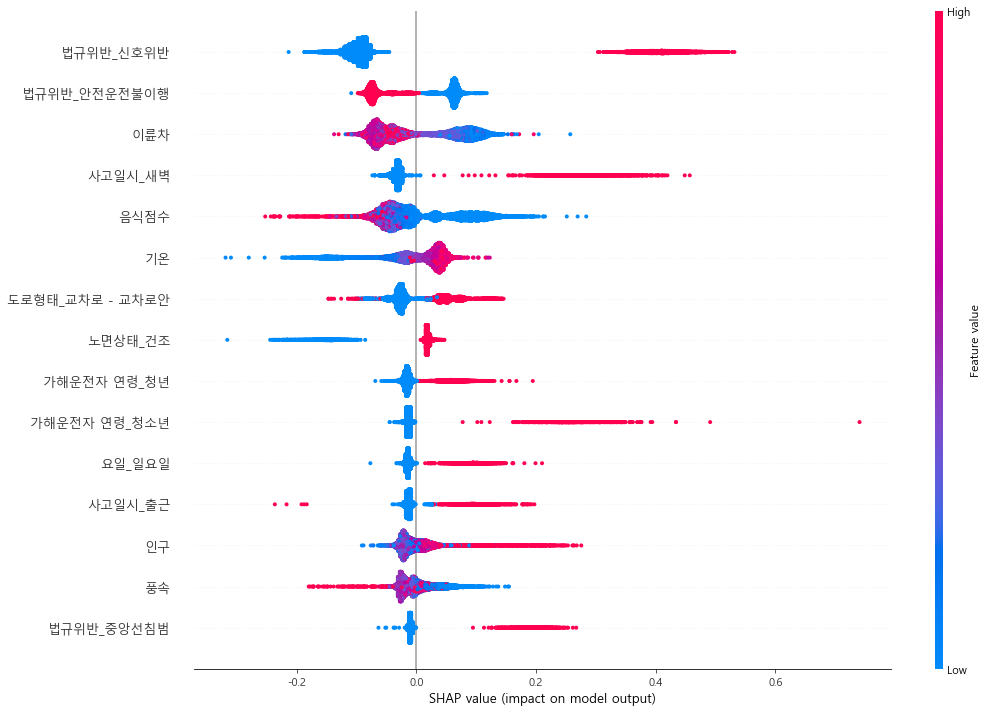

In [47]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [48]:
test_X.columns.shape

(62,)

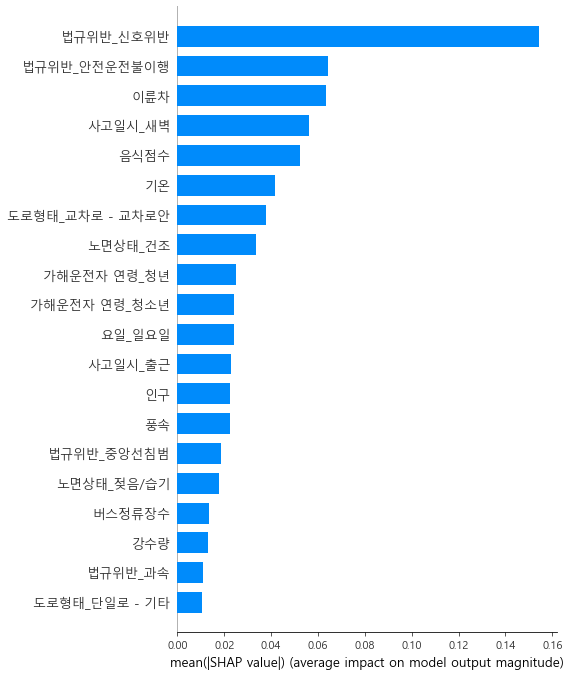

In [49]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

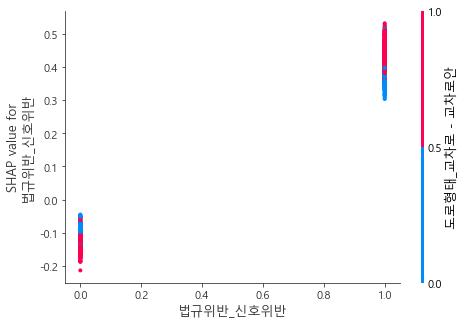

In [50]:
# 변수 간의 shap value 파악
shap.dependence_plot("법규위반_신호위반", shap_values, test_X)

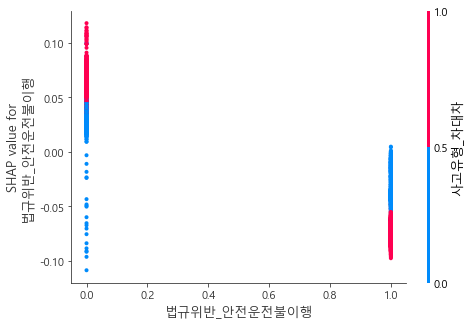

In [51]:
# 변수 간의 shap value 파악
shap.dependence_plot("법규위반_안전운전불이행", shap_values, test_X)

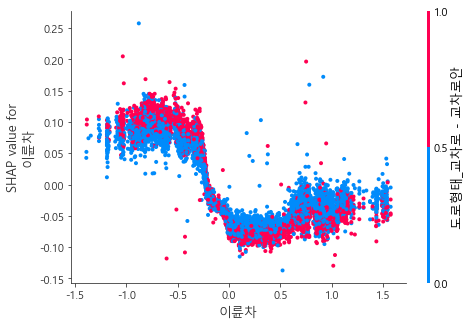

In [52]:
# 변수 간의 shap value 파악
shap.dependence_plot("이륜차", shap_values, test_X)

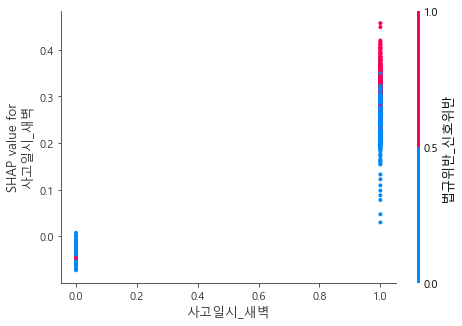

In [53]:
# 변수 간의 shap value 파악
shap.dependence_plot("사고일시_새벽", shap_values, test_X)

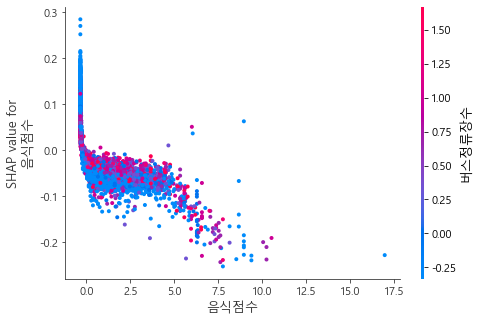

In [54]:
# 변수 간의 shap value 파악
shap.dependence_plot("음식점수", shap_values, test_X)

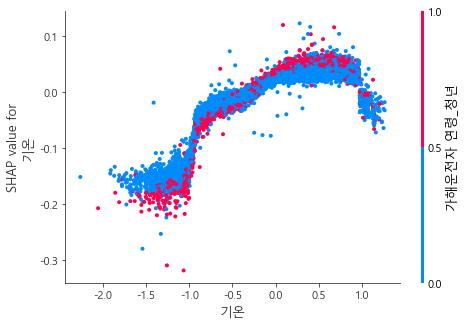

In [55]:
# 변수 간의 shap value 파악
shap.dependence_plot('기온', shap_values, test_X)

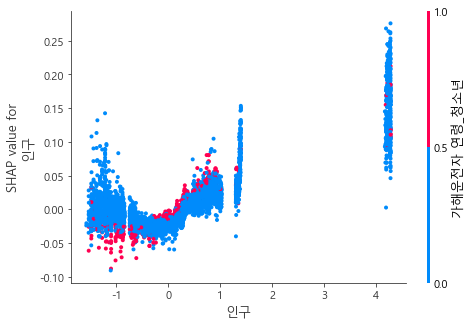

In [56]:
# 변수 간의 shap value 파악
shap.dependence_plot('인구', shap_values, test_X)

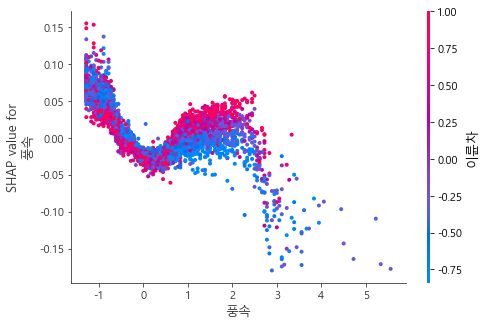

In [57]:
# 변수 간의 shap value 파악
shap.dependence_plot('풍속', shap_values, test_X)

In [58]:
feature_names = train_X.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
33,법규위반_신호위반,0.154258
35,법규위반_안전운전불이행,0.064468
0,이륜차,0.063377
12,사고일시_새벽,0.056215
7,음식점수,0.052377
2,기온,0.041679
47,도로형태_교차로 - 교차로안,0.037982
39,노면상태_건조,0.033787
60,가해운전자 연령_청년,0.025213
61,가해운전자 연령_청소년,0.024162


#### 0.01 cutoff

In [59]:
x_list = shap_importance[shap_importance.feature_importance_vals>=0.01]['col_name'].tolist()

In [60]:
train_cut_X = train_X[x_list]
test_cut_X = test_X[x_list]

In [61]:
train_cut_X.shape

(49123, 20)

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
cb_cut = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb_cut = GridSearchCV(cb_cut, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb_cut.fit(train_cut_X, train_y)

# Print the best parameters and the best score
print("Best parameters:", grid_search_cb_cut.best_params_)


25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 2339, in _fit
    train_params = self._prepare_train_params(
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost

0:	learn: 2.3205420	total: 4.47ms	remaining: 4.47s
1:	learn: 2.3200675	total: 8.22ms	remaining: 4.1s
2:	learn: 2.3196150	total: 11.9ms	remaining: 3.97s
3:	learn: 2.3192030	total: 16ms	remaining: 4s
4:	learn: 2.3187309	total: 20.3ms	remaining: 4.05s
5:	learn: 2.3182781	total: 24.9ms	remaining: 4.12s
6:	learn: 2.3178170	total: 30.6ms	remaining: 4.34s
7:	learn: 2.3174121	total: 35.5ms	remaining: 4.4s
8:	learn: 2.3169645	total: 40.4ms	remaining: 4.45s
9:	learn: 2.3165132	total: 45.4ms	remaining: 4.5s
10:	learn: 2.3161109	total: 50.5ms	remaining: 4.54s
11:	learn: 2.3157200	total: 55.7ms	remaining: 4.58s
12:	learn: 2.3152970	total: 60.9ms	remaining: 4.63s
13:	learn: 2.3149146	total: 65.5ms	remaining: 4.61s
14:	learn: 2.3145267	total: 70.4ms	remaining: 4.62s
15:	learn: 2.3141106	total: 75.2ms	remaining: 4.62s
16:	learn: 2.3137357	total: 79.8ms	remaining: 4.61s
17:	learn: 2.3133758	total: 84.5ms	remaining: 4.61s
18:	learn: 2.3130093	total: 88.8ms	remaining: 4.58s
19:	learn: 2.3126542	total: 93

185:	learn: 2.2891415	total: 888ms	remaining: 3.89s
186:	learn: 2.2890954	total: 894ms	remaining: 3.89s
187:	learn: 2.2890369	total: 900ms	remaining: 3.89s
188:	learn: 2.2889697	total: 906ms	remaining: 3.88s
189:	learn: 2.2889198	total: 911ms	remaining: 3.88s
190:	learn: 2.2888493	total: 916ms	remaining: 3.88s
191:	learn: 2.2887808	total: 922ms	remaining: 3.88s
192:	learn: 2.2887088	total: 927ms	remaining: 3.88s
193:	learn: 2.2886544	total: 932ms	remaining: 3.87s
194:	learn: 2.2886076	total: 938ms	remaining: 3.87s
195:	learn: 2.2885524	total: 943ms	remaining: 3.87s
196:	learn: 2.2885036	total: 948ms	remaining: 3.87s
197:	learn: 2.2884626	total: 954ms	remaining: 3.86s
198:	learn: 2.2883997	total: 960ms	remaining: 3.86s
199:	learn: 2.2883305	total: 966ms	remaining: 3.86s
200:	learn: 2.2882872	total: 972ms	remaining: 3.86s
201:	learn: 2.2882269	total: 977ms	remaining: 3.86s
202:	learn: 2.2881626	total: 983ms	remaining: 3.86s
203:	learn: 2.2881044	total: 988ms	remaining: 3.85s
204:	learn: 

368:	learn: 2.2812149	total: 1.77s	remaining: 3.03s
369:	learn: 2.2811848	total: 1.78s	remaining: 3.03s
370:	learn: 2.2811540	total: 1.78s	remaining: 3.02s
371:	learn: 2.2811152	total: 1.79s	remaining: 3.02s
372:	learn: 2.2810948	total: 1.79s	remaining: 3.01s
373:	learn: 2.2810472	total: 1.8s	remaining: 3.01s
374:	learn: 2.2810282	total: 1.8s	remaining: 3s
375:	learn: 2.2809973	total: 1.8s	remaining: 3s
376:	learn: 2.2809694	total: 1.81s	remaining: 2.99s
377:	learn: 2.2809402	total: 1.81s	remaining: 2.98s
378:	learn: 2.2809132	total: 1.82s	remaining: 2.98s
379:	learn: 2.2808861	total: 1.82s	remaining: 2.97s
380:	learn: 2.2808549	total: 1.83s	remaining: 2.97s
381:	learn: 2.2808372	total: 1.83s	remaining: 2.96s
382:	learn: 2.2807936	total: 1.84s	remaining: 2.96s
383:	learn: 2.2807665	total: 1.84s	remaining: 2.95s
384:	learn: 2.2807316	total: 1.84s	remaining: 2.95s
385:	learn: 2.2807130	total: 1.85s	remaining: 2.94s
386:	learn: 2.2806792	total: 1.85s	remaining: 2.94s
387:	learn: 2.2806641

528:	learn: 2.2766197	total: 2.48s	remaining: 2.21s
529:	learn: 2.2765889	total: 2.49s	remaining: 2.21s
530:	learn: 2.2765593	total: 2.49s	remaining: 2.2s
531:	learn: 2.2765365	total: 2.5s	remaining: 2.2s
532:	learn: 2.2765201	total: 2.5s	remaining: 2.19s
533:	learn: 2.2764970	total: 2.51s	remaining: 2.19s
534:	learn: 2.2764774	total: 2.51s	remaining: 2.18s
535:	learn: 2.2764632	total: 2.52s	remaining: 2.18s
536:	learn: 2.2764415	total: 2.52s	remaining: 2.17s
537:	learn: 2.2764186	total: 2.53s	remaining: 2.17s
538:	learn: 2.2763983	total: 2.53s	remaining: 2.17s
539:	learn: 2.2763832	total: 2.54s	remaining: 2.16s
540:	learn: 2.2763654	total: 2.54s	remaining: 2.15s
541:	learn: 2.2763472	total: 2.54s	remaining: 2.15s
542:	learn: 2.2763256	total: 2.55s	remaining: 2.15s
543:	learn: 2.2762879	total: 2.55s	remaining: 2.14s
544:	learn: 2.2762494	total: 2.56s	remaining: 2.14s
545:	learn: 2.2762245	total: 2.56s	remaining: 2.13s
546:	learn: 2.2762018	total: 2.57s	remaining: 2.13s
547:	learn: 2.27

689:	learn: 2.2731520	total: 3.2s	remaining: 1.44s
690:	learn: 2.2731329	total: 3.2s	remaining: 1.43s
691:	learn: 2.2731108	total: 3.21s	remaining: 1.43s
692:	learn: 2.2730626	total: 3.21s	remaining: 1.42s
693:	learn: 2.2730445	total: 3.22s	remaining: 1.42s
694:	learn: 2.2730349	total: 3.22s	remaining: 1.41s
695:	learn: 2.2730184	total: 3.22s	remaining: 1.41s
696:	learn: 2.2729993	total: 3.23s	remaining: 1.4s
697:	learn: 2.2729860	total: 3.23s	remaining: 1.4s
698:	learn: 2.2729593	total: 3.24s	remaining: 1.39s
699:	learn: 2.2729366	total: 3.24s	remaining: 1.39s
700:	learn: 2.2729215	total: 3.25s	remaining: 1.38s
701:	learn: 2.2729129	total: 3.25s	remaining: 1.38s
702:	learn: 2.2728941	total: 3.25s	remaining: 1.38s
703:	learn: 2.2728638	total: 3.26s	remaining: 1.37s
704:	learn: 2.2728451	total: 3.26s	remaining: 1.36s
705:	learn: 2.2728286	total: 3.27s	remaining: 1.36s
706:	learn: 2.2727990	total: 3.27s	remaining: 1.36s
707:	learn: 2.2727852	total: 3.28s	remaining: 1.35s
708:	learn: 2.27

848:	learn: 2.2701251	total: 3.91s	remaining: 695ms
849:	learn: 2.2701093	total: 3.91s	remaining: 691ms
850:	learn: 2.2700959	total: 3.92s	remaining: 686ms
851:	learn: 2.2700791	total: 3.92s	remaining: 682ms
852:	learn: 2.2700573	total: 3.93s	remaining: 677ms
853:	learn: 2.2700415	total: 3.93s	remaining: 672ms
854:	learn: 2.2700264	total: 3.94s	remaining: 668ms
855:	learn: 2.2700024	total: 3.94s	remaining: 663ms
856:	learn: 2.2699940	total: 3.95s	remaining: 659ms
857:	learn: 2.2699684	total: 3.95s	remaining: 654ms
858:	learn: 2.2699559	total: 3.96s	remaining: 649ms
859:	learn: 2.2699378	total: 3.96s	remaining: 645ms
860:	learn: 2.2699232	total: 3.96s	remaining: 640ms
861:	learn: 2.2699065	total: 3.97s	remaining: 636ms
862:	learn: 2.2698890	total: 3.98s	remaining: 631ms
863:	learn: 2.2698693	total: 3.98s	remaining: 627ms
864:	learn: 2.2698394	total: 3.98s	remaining: 622ms
865:	learn: 2.2698257	total: 3.99s	remaining: 617ms
866:	learn: 2.2698161	total: 4s	remaining: 613ms
867:	learn: 2.2

In [63]:
cb_cut = CatBoostRegressor(depth=5, learning_rate=0.01, random_state=42)
cb_cut.fit(train_cut_X, train_y)

print(f"RMSE for CatBoost : {round(mean_squared_error(test_y, cb_cut.predict(test_X))**0.5,3)}")
print(f"RMSLE for CatBoost : {round(mean_squared_log_error(test_y, cb_cut.predict(test_X))**0.5,3)}")

0:	learn: 2.3205420	total: 6.59ms	remaining: 6.59s
1:	learn: 2.3200675	total: 11.6ms	remaining: 5.77s
2:	learn: 2.3196150	total: 16.6ms	remaining: 5.5s
3:	learn: 2.3192030	total: 21.1ms	remaining: 5.26s
4:	learn: 2.3187309	total: 25.9ms	remaining: 5.16s
5:	learn: 2.3182781	total: 30.7ms	remaining: 5.08s
6:	learn: 2.3178170	total: 35.1ms	remaining: 4.98s
7:	learn: 2.3174121	total: 39.4ms	remaining: 4.88s
8:	learn: 2.3169645	total: 44ms	remaining: 4.85s
9:	learn: 2.3165132	total: 49ms	remaining: 4.85s
10:	learn: 2.3161109	total: 54.2ms	remaining: 4.87s
11:	learn: 2.3157200	total: 59ms	remaining: 4.86s
12:	learn: 2.3152970	total: 63.9ms	remaining: 4.85s
13:	learn: 2.3149146	total: 69.3ms	remaining: 4.88s
14:	learn: 2.3145267	total: 75ms	remaining: 4.92s
15:	learn: 2.3141106	total: 80.8ms	remaining: 4.97s
16:	learn: 2.3137357	total: 87.1ms	remaining: 5.04s
17:	learn: 2.3133758	total: 92.4ms	remaining: 5.04s
18:	learn: 2.3130093	total: 97.4ms	remaining: 5.03s
19:	learn: 2.3126542	total: 102

193:	learn: 2.2886544	total: 903ms	remaining: 3.75s
194:	learn: 2.2886076	total: 908ms	remaining: 3.75s
195:	learn: 2.2885524	total: 912ms	remaining: 3.74s
196:	learn: 2.2885036	total: 918ms	remaining: 3.74s
197:	learn: 2.2884626	total: 923ms	remaining: 3.74s
198:	learn: 2.2883997	total: 928ms	remaining: 3.74s
199:	learn: 2.2883305	total: 934ms	remaining: 3.73s
200:	learn: 2.2882872	total: 939ms	remaining: 3.73s
201:	learn: 2.2882269	total: 943ms	remaining: 3.73s
202:	learn: 2.2881626	total: 948ms	remaining: 3.72s
203:	learn: 2.2881044	total: 953ms	remaining: 3.72s
204:	learn: 2.2880412	total: 958ms	remaining: 3.71s
205:	learn: 2.2879755	total: 962ms	remaining: 3.71s
206:	learn: 2.2879197	total: 966ms	remaining: 3.7s
207:	learn: 2.2878771	total: 971ms	remaining: 3.7s
208:	learn: 2.2878251	total: 976ms	remaining: 3.69s
209:	learn: 2.2877669	total: 981ms	remaining: 3.69s
210:	learn: 2.2877110	total: 985ms	remaining: 3.68s
211:	learn: 2.2876586	total: 989ms	remaining: 3.68s
212:	learn: 2.

390:	learn: 2.2805590	total: 1.79s	remaining: 2.79s
391:	learn: 2.2805402	total: 1.8s	remaining: 2.79s
392:	learn: 2.2805003	total: 1.8s	remaining: 2.78s
393:	learn: 2.2804792	total: 1.81s	remaining: 2.78s
394:	learn: 2.2804354	total: 1.81s	remaining: 2.77s
395:	learn: 2.2804040	total: 1.82s	remaining: 2.77s
396:	learn: 2.2803564	total: 1.82s	remaining: 2.77s
397:	learn: 2.2803294	total: 1.82s	remaining: 2.76s
398:	learn: 2.2802946	total: 1.83s	remaining: 2.75s
399:	learn: 2.2802728	total: 1.83s	remaining: 2.75s
400:	learn: 2.2802400	total: 1.84s	remaining: 2.75s
401:	learn: 2.2802138	total: 1.84s	remaining: 2.74s
402:	learn: 2.2801836	total: 1.85s	remaining: 2.74s
403:	learn: 2.2801449	total: 1.85s	remaining: 2.73s
404:	learn: 2.2801047	total: 1.86s	remaining: 2.73s
405:	learn: 2.2800735	total: 1.86s	remaining: 2.72s
406:	learn: 2.2800330	total: 1.86s	remaining: 2.72s
407:	learn: 2.2800055	total: 1.87s	remaining: 2.71s
408:	learn: 2.2799740	total: 1.87s	remaining: 2.71s
409:	learn: 2.

587:	learn: 2.2752954	total: 2.68s	remaining: 1.88s
588:	learn: 2.2752785	total: 2.69s	remaining: 1.87s
589:	learn: 2.2752415	total: 2.69s	remaining: 1.87s
590:	learn: 2.2752129	total: 2.69s	remaining: 1.86s
591:	learn: 2.2752020	total: 2.7s	remaining: 1.86s
592:	learn: 2.2751796	total: 2.7s	remaining: 1.86s
593:	learn: 2.2751619	total: 2.71s	remaining: 1.85s
594:	learn: 2.2751253	total: 2.71s	remaining: 1.85s
595:	learn: 2.2750983	total: 2.72s	remaining: 1.84s
596:	learn: 2.2750646	total: 2.72s	remaining: 1.84s
597:	learn: 2.2750564	total: 2.73s	remaining: 1.83s
598:	learn: 2.2750431	total: 2.73s	remaining: 1.83s
599:	learn: 2.2750056	total: 2.74s	remaining: 1.82s
600:	learn: 2.2749972	total: 2.74s	remaining: 1.82s
601:	learn: 2.2749815	total: 2.74s	remaining: 1.81s
602:	learn: 2.2749463	total: 2.75s	remaining: 1.81s
603:	learn: 2.2749049	total: 2.75s	remaining: 1.8s
604:	learn: 2.2748821	total: 2.76s	remaining: 1.8s
605:	learn: 2.2748644	total: 2.76s	remaining: 1.79s
606:	learn: 2.27

747:	learn: 2.2720076	total: 3.39s	remaining: 1.14s
748:	learn: 2.2719978	total: 3.4s	remaining: 1.14s
749:	learn: 2.2719715	total: 3.4s	remaining: 1.13s
750:	learn: 2.2719585	total: 3.4s	remaining: 1.13s
751:	learn: 2.2719365	total: 3.41s	remaining: 1.12s
752:	learn: 2.2719183	total: 3.41s	remaining: 1.12s
753:	learn: 2.2719043	total: 3.42s	remaining: 1.11s
754:	learn: 2.2718904	total: 3.42s	remaining: 1.11s
755:	learn: 2.2718810	total: 3.43s	remaining: 1.11s
756:	learn: 2.2718562	total: 3.43s	remaining: 1.1s
757:	learn: 2.2718253	total: 3.44s	remaining: 1.1s
758:	learn: 2.2718195	total: 3.44s	remaining: 1.09s
759:	learn: 2.2717994	total: 3.44s	remaining: 1.09s
760:	learn: 2.2717853	total: 3.45s	remaining: 1.08s
761:	learn: 2.2717465	total: 3.45s	remaining: 1.08s
762:	learn: 2.2717197	total: 3.46s	remaining: 1.07s
763:	learn: 2.2717033	total: 3.46s	remaining: 1.07s
764:	learn: 2.2716784	total: 3.47s	remaining: 1.06s
765:	learn: 2.2716624	total: 3.47s	remaining: 1.06s
766:	learn: 2.271

944:	learn: 2.2684369	total: 4.28s	remaining: 249ms
945:	learn: 2.2684286	total: 4.28s	remaining: 245ms
946:	learn: 2.2684179	total: 4.29s	remaining: 240ms
947:	learn: 2.2684073	total: 4.29s	remaining: 236ms
948:	learn: 2.2683938	total: 4.3s	remaining: 231ms
949:	learn: 2.2683599	total: 4.3s	remaining: 227ms
950:	learn: 2.2683474	total: 4.31s	remaining: 222ms
951:	learn: 2.2683392	total: 4.31s	remaining: 217ms
952:	learn: 2.2683270	total: 4.32s	remaining: 213ms
953:	learn: 2.2683008	total: 4.32s	remaining: 208ms
954:	learn: 2.2682864	total: 4.33s	remaining: 204ms
955:	learn: 2.2682649	total: 4.33s	remaining: 199ms
956:	learn: 2.2682504	total: 4.33s	remaining: 195ms
957:	learn: 2.2682465	total: 4.34s	remaining: 190ms
958:	learn: 2.2682161	total: 4.34s	remaining: 186ms
959:	learn: 2.2681894	total: 4.35s	remaining: 181ms
960:	learn: 2.2681699	total: 4.35s	remaining: 177ms
961:	learn: 2.2681473	total: 4.36s	remaining: 172ms
962:	learn: 2.2681167	total: 4.36s	remaining: 168ms
963:	learn: 2.

#### 0.005 cutoff

In [64]:
x_list1 = shap_importance[shap_importance.feature_importance_vals>=0.005]['col_name'].tolist()

In [65]:
train_cut_X_1 = train_X[x_list1]
test_cut_X_1 = test_X[x_list1]

In [66]:
train_cut_X_1.shape

(49123, 31)

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
cb_cut = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb_cut = GridSearchCV(cb_cut, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb_cut.fit(train_cut_X_1, train_y)

# Print the best parameters and the best score
print("Best parameters:", grid_search_cb_cut.best_params_)


25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost\core.py", line 2339, in _fit
    train_params = self._prepare_train_params(
  File "C:\Users\jwshi\anaconda3\lib\site-packages\catboost

0:	learn: 2.3205367	total: 7.86ms	remaining: 7.85s
1:	learn: 2.3199454	total: 14.9ms	remaining: 7.42s
2:	learn: 2.3194032	total: 21.6ms	remaining: 7.18s
3:	learn: 2.3189129	total: 26.9ms	remaining: 6.69s
4:	learn: 2.3184400	total: 33ms	remaining: 6.57s
5:	learn: 2.3179140	total: 39.3ms	remaining: 6.51s
6:	learn: 2.3174239	total: 45.9ms	remaining: 6.51s
7:	learn: 2.3169694	total: 53.2ms	remaining: 6.6s
8:	learn: 2.3164863	total: 60.6ms	remaining: 6.67s
9:	learn: 2.3159853	total: 68.4ms	remaining: 6.78s
10:	learn: 2.3155524	total: 75.9ms	remaining: 6.82s
11:	learn: 2.3151074	total: 83.6ms	remaining: 6.88s
12:	learn: 2.3146275	total: 90.4ms	remaining: 6.87s
13:	learn: 2.3141386	total: 97.2ms	remaining: 6.85s
14:	learn: 2.3137377	total: 103ms	remaining: 6.75s
15:	learn: 2.3132839	total: 109ms	remaining: 6.72s
16:	learn: 2.3128993	total: 116ms	remaining: 6.7s
17:	learn: 2.3125244	total: 122ms	remaining: 6.68s
18:	learn: 2.3121269	total: 129ms	remaining: 6.65s
19:	learn: 2.3117750	total: 135

186:	learn: 2.2816710	total: 1.28s	remaining: 5.55s
187:	learn: 2.2815763	total: 1.28s	remaining: 5.54s
188:	learn: 2.2814803	total: 1.29s	remaining: 5.54s
189:	learn: 2.2813821	total: 1.3s	remaining: 5.53s
190:	learn: 2.2812780	total: 1.3s	remaining: 5.53s
191:	learn: 2.2811953	total: 1.31s	remaining: 5.52s
192:	learn: 2.2811109	total: 1.32s	remaining: 5.51s
193:	learn: 2.2810393	total: 1.32s	remaining: 5.5s
194:	learn: 2.2809587	total: 1.33s	remaining: 5.5s
195:	learn: 2.2808568	total: 1.34s	remaining: 5.49s
196:	learn: 2.2807898	total: 1.34s	remaining: 5.48s
197:	learn: 2.2807266	total: 1.35s	remaining: 5.48s
198:	learn: 2.2806450	total: 1.36s	remaining: 5.47s
199:	learn: 2.2805398	total: 1.37s	remaining: 5.47s
200:	learn: 2.2804798	total: 1.37s	remaining: 5.46s
201:	learn: 2.2803796	total: 1.38s	remaining: 5.46s
202:	learn: 2.2803111	total: 1.39s	remaining: 5.45s
203:	learn: 2.2802072	total: 1.39s	remaining: 5.44s
204:	learn: 2.2801193	total: 1.4s	remaining: 5.43s
205:	learn: 2.280

365:	learn: 2.2687602	total: 2.54s	remaining: 4.41s
366:	learn: 2.2686906	total: 2.55s	remaining: 4.4s
367:	learn: 2.2686382	total: 2.56s	remaining: 4.4s
368:	learn: 2.2685772	total: 2.57s	remaining: 4.39s
369:	learn: 2.2685249	total: 2.58s	remaining: 4.39s
370:	learn: 2.2684556	total: 2.58s	remaining: 4.38s
371:	learn: 2.2684009	total: 2.59s	remaining: 4.38s
372:	learn: 2.2683423	total: 2.6s	remaining: 4.37s
373:	learn: 2.2682880	total: 2.6s	remaining: 4.36s
374:	learn: 2.2682382	total: 2.61s	remaining: 4.35s
375:	learn: 2.2682052	total: 2.62s	remaining: 4.34s
376:	learn: 2.2681558	total: 2.63s	remaining: 4.34s
377:	learn: 2.2680946	total: 2.63s	remaining: 4.33s
378:	learn: 2.2680078	total: 2.64s	remaining: 4.33s
379:	learn: 2.2679723	total: 2.65s	remaining: 4.32s
380:	learn: 2.2678835	total: 2.65s	remaining: 4.31s
381:	learn: 2.2678069	total: 2.66s	remaining: 4.31s
382:	learn: 2.2677272	total: 2.67s	remaining: 4.3s
383:	learn: 2.2676727	total: 2.68s	remaining: 4.29s
384:	learn: 2.267

524:	learn: 2.2602372	total: 3.63s	remaining: 3.28s
525:	learn: 2.2601880	total: 3.63s	remaining: 3.27s
526:	learn: 2.2601429	total: 3.64s	remaining: 3.27s
527:	learn: 2.2601060	total: 3.65s	remaining: 3.26s
528:	learn: 2.2600793	total: 3.65s	remaining: 3.25s
529:	learn: 2.2600500	total: 3.66s	remaining: 3.25s
530:	learn: 2.2600065	total: 3.67s	remaining: 3.24s
531:	learn: 2.2599496	total: 3.67s	remaining: 3.23s
532:	learn: 2.2599086	total: 3.68s	remaining: 3.23s
533:	learn: 2.2598541	total: 3.69s	remaining: 3.22s
534:	learn: 2.2597831	total: 3.69s	remaining: 3.21s
535:	learn: 2.2597451	total: 3.7s	remaining: 3.2s
536:	learn: 2.2596927	total: 3.71s	remaining: 3.2s
537:	learn: 2.2596480	total: 3.71s	remaining: 3.19s
538:	learn: 2.2595997	total: 3.72s	remaining: 3.18s
539:	learn: 2.2595491	total: 3.73s	remaining: 3.18s
540:	learn: 2.2594816	total: 3.73s	remaining: 3.17s
541:	learn: 2.2594435	total: 3.74s	remaining: 3.16s
542:	learn: 2.2593889	total: 3.75s	remaining: 3.15s
543:	learn: 2.2

685:	learn: 2.2529186	total: 4.7s	remaining: 2.15s
686:	learn: 2.2528656	total: 4.71s	remaining: 2.15s
687:	learn: 2.2528154	total: 4.72s	remaining: 2.14s
688:	learn: 2.2527508	total: 4.73s	remaining: 2.13s
689:	learn: 2.2527257	total: 4.73s	remaining: 2.13s
690:	learn: 2.2526614	total: 4.74s	remaining: 2.12s
691:	learn: 2.2526300	total: 4.75s	remaining: 2.11s
692:	learn: 2.2526060	total: 4.75s	remaining: 2.11s
693:	learn: 2.2525695	total: 4.76s	remaining: 2.1s
694:	learn: 2.2525353	total: 4.77s	remaining: 2.09s
695:	learn: 2.2524810	total: 4.77s	remaining: 2.08s
696:	learn: 2.2524391	total: 4.78s	remaining: 2.08s
697:	learn: 2.2523956	total: 4.79s	remaining: 2.07s
698:	learn: 2.2523424	total: 4.79s	remaining: 2.06s
699:	learn: 2.2522891	total: 4.8s	remaining: 2.06s
700:	learn: 2.2522431	total: 4.81s	remaining: 2.05s
701:	learn: 2.2522133	total: 4.81s	remaining: 2.04s
702:	learn: 2.2521733	total: 4.82s	remaining: 2.04s
703:	learn: 2.2521483	total: 4.83s	remaining: 2.03s
704:	learn: 2.2

844:	learn: 2.2464271	total: 5.78s	remaining: 1.06s
845:	learn: 2.2464103	total: 5.79s	remaining: 1.05s
846:	learn: 2.2463703	total: 5.8s	remaining: 1.05s
847:	learn: 2.2463446	total: 5.81s	remaining: 1.04s
848:	learn: 2.2463100	total: 5.81s	remaining: 1.03s
849:	learn: 2.2462983	total: 5.82s	remaining: 1.03s
850:	learn: 2.2462567	total: 5.83s	remaining: 1.02s
851:	learn: 2.2462062	total: 5.83s	remaining: 1.01s
852:	learn: 2.2461785	total: 5.84s	remaining: 1.01s
853:	learn: 2.2461298	total: 5.85s	remaining: 1000ms
854:	learn: 2.2461044	total: 5.85s	remaining: 993ms
855:	learn: 2.2460628	total: 5.86s	remaining: 986ms
856:	learn: 2.2460125	total: 5.87s	remaining: 979ms
857:	learn: 2.2459786	total: 5.87s	remaining: 972ms
858:	learn: 2.2459514	total: 5.88s	remaining: 965ms
859:	learn: 2.2458622	total: 5.89s	remaining: 958ms
860:	learn: 2.2458370	total: 5.89s	remaining: 952ms
861:	learn: 2.2457964	total: 5.9s	remaining: 945ms
862:	learn: 2.2457606	total: 5.91s	remaining: 938ms
863:	learn: 2

In [68]:
cb_cut = CatBoostRegressor(depth=7, learning_rate=0.01, random_state=42)
cb_cut.fit(train_cut_X_1, train_y)

print(f"RMSE for CatBoost : {round(mean_squared_error(test_y, cb_cut.predict(test_X))**0.5,3)}")
print(f"RMSLE for CatBoost : {round(mean_squared_log_error(test_y, cb_cut.predict(test_X))**0.5,3)}")

0:	learn: 2.3205367	total: 8.04ms	remaining: 8.03s
1:	learn: 2.3199454	total: 15ms	remaining: 7.48s
2:	learn: 2.3194032	total: 22.2ms	remaining: 7.37s
3:	learn: 2.3189129	total: 29.1ms	remaining: 7.24s
4:	learn: 2.3184400	total: 36.1ms	remaining: 7.18s
5:	learn: 2.3179140	total: 42.8ms	remaining: 7.08s
6:	learn: 2.3174239	total: 49.9ms	remaining: 7.08s
7:	learn: 2.3169694	total: 57.3ms	remaining: 7.11s
8:	learn: 2.3164863	total: 65.5ms	remaining: 7.21s
9:	learn: 2.3159853	total: 73.1ms	remaining: 7.24s
10:	learn: 2.3155524	total: 81.4ms	remaining: 7.32s
11:	learn: 2.3151074	total: 89.5ms	remaining: 7.37s
12:	learn: 2.3146275	total: 97ms	remaining: 7.36s
13:	learn: 2.3141386	total: 104ms	remaining: 7.33s
14:	learn: 2.3137377	total: 110ms	remaining: 7.22s
15:	learn: 2.3132839	total: 117ms	remaining: 7.17s
16:	learn: 2.3128993	total: 123ms	remaining: 7.11s
17:	learn: 2.3125244	total: 130ms	remaining: 7.07s
18:	learn: 2.3121269	total: 136ms	remaining: 7.03s
19:	learn: 2.3117750	total: 143m

182:	learn: 2.2820132	total: 1.27s	remaining: 5.66s
183:	learn: 2.2819236	total: 1.27s	remaining: 5.66s
184:	learn: 2.2818126	total: 1.28s	remaining: 5.65s
185:	learn: 2.2817458	total: 1.29s	remaining: 5.64s
186:	learn: 2.2816710	total: 1.29s	remaining: 5.63s
187:	learn: 2.2815763	total: 1.3s	remaining: 5.62s
188:	learn: 2.2814803	total: 1.31s	remaining: 5.62s
189:	learn: 2.2813821	total: 1.31s	remaining: 5.61s
190:	learn: 2.2812780	total: 1.32s	remaining: 5.6s
191:	learn: 2.2811953	total: 1.33s	remaining: 5.59s
192:	learn: 2.2811109	total: 1.34s	remaining: 5.59s
193:	learn: 2.2810393	total: 1.34s	remaining: 5.58s
194:	learn: 2.2809587	total: 1.35s	remaining: 5.58s
195:	learn: 2.2808568	total: 1.36s	remaining: 5.57s
196:	learn: 2.2807898	total: 1.36s	remaining: 5.56s
197:	learn: 2.2807266	total: 1.37s	remaining: 5.56s
198:	learn: 2.2806450	total: 1.38s	remaining: 5.55s
199:	learn: 2.2805398	total: 1.39s	remaining: 5.54s
200:	learn: 2.2804798	total: 1.39s	remaining: 5.53s
201:	learn: 2.

342:	learn: 2.2701104	total: 2.36s	remaining: 4.52s
343:	learn: 2.2700801	total: 2.37s	remaining: 4.51s
344:	learn: 2.2700024	total: 2.37s	remaining: 4.51s
345:	learn: 2.2699474	total: 2.38s	remaining: 4.5s
346:	learn: 2.2698890	total: 2.39s	remaining: 4.49s
347:	learn: 2.2698788	total: 2.39s	remaining: 4.48s
348:	learn: 2.2697637	total: 2.4s	remaining: 4.47s
349:	learn: 2.2696967	total: 2.4s	remaining: 4.47s
350:	learn: 2.2696312	total: 2.41s	remaining: 4.46s
351:	learn: 2.2695521	total: 2.42s	remaining: 4.45s
352:	learn: 2.2694909	total: 2.42s	remaining: 4.45s
353:	learn: 2.2694403	total: 2.43s	remaining: 4.44s
354:	learn: 2.2693665	total: 2.44s	remaining: 4.43s
355:	learn: 2.2693302	total: 2.44s	remaining: 4.42s
356:	learn: 2.2692700	total: 2.45s	remaining: 4.42s
357:	learn: 2.2692128	total: 2.48s	remaining: 4.44s
358:	learn: 2.2691657	total: 2.48s	remaining: 4.44s
359:	learn: 2.2690918	total: 2.49s	remaining: 4.43s
360:	learn: 2.2690268	total: 2.5s	remaining: 4.42s
361:	learn: 2.26

501:	learn: 2.2613533	total: 3.43s	remaining: 3.41s
502:	learn: 2.2612717	total: 3.44s	remaining: 3.4s
503:	learn: 2.2612409	total: 3.45s	remaining: 3.39s
504:	learn: 2.2611805	total: 3.45s	remaining: 3.39s
505:	learn: 2.2611346	total: 3.46s	remaining: 3.38s
506:	learn: 2.2610886	total: 3.47s	remaining: 3.37s
507:	learn: 2.2610604	total: 3.47s	remaining: 3.36s
508:	learn: 2.2609873	total: 3.48s	remaining: 3.36s
509:	learn: 2.2609425	total: 3.49s	remaining: 3.35s
510:	learn: 2.2609219	total: 3.49s	remaining: 3.34s
511:	learn: 2.2608615	total: 3.5s	remaining: 3.33s
512:	learn: 2.2608230	total: 3.5s	remaining: 3.33s
513:	learn: 2.2607846	total: 3.51s	remaining: 3.32s
514:	learn: 2.2607293	total: 3.52s	remaining: 3.31s
515:	learn: 2.2606993	total: 3.52s	remaining: 3.31s
516:	learn: 2.2606492	total: 3.53s	remaining: 3.3s
517:	learn: 2.2605908	total: 3.54s	remaining: 3.29s
518:	learn: 2.2605287	total: 3.54s	remaining: 3.29s
519:	learn: 2.2604804	total: 3.55s	remaining: 3.28s
520:	learn: 2.26

661:	learn: 2.2538077	total: 4.51s	remaining: 2.3s
662:	learn: 2.2537685	total: 4.51s	remaining: 2.29s
663:	learn: 2.2537420	total: 4.52s	remaining: 2.29s
664:	learn: 2.2537276	total: 4.53s	remaining: 2.28s
665:	learn: 2.2536892	total: 4.54s	remaining: 2.27s
666:	learn: 2.2536727	total: 4.54s	remaining: 2.27s
667:	learn: 2.2536219	total: 4.55s	remaining: 2.26s
668:	learn: 2.2535718	total: 4.56s	remaining: 2.25s
669:	learn: 2.2535187	total: 4.56s	remaining: 2.25s
670:	learn: 2.2534765	total: 4.57s	remaining: 2.24s
671:	learn: 2.2534386	total: 4.58s	remaining: 2.23s
672:	learn: 2.2533880	total: 4.59s	remaining: 2.23s
673:	learn: 2.2533589	total: 4.59s	remaining: 2.22s
674:	learn: 2.2533264	total: 4.6s	remaining: 2.21s
675:	learn: 2.2533013	total: 4.61s	remaining: 2.21s
676:	learn: 2.2532693	total: 4.61s	remaining: 2.2s
677:	learn: 2.2532333	total: 4.62s	remaining: 2.19s
678:	learn: 2.2532114	total: 4.63s	remaining: 2.19s
679:	learn: 2.2531733	total: 4.63s	remaining: 2.18s
680:	learn: 2.2

823:	learn: 2.2472735	total: 5.58s	remaining: 1.19s
824:	learn: 2.2472463	total: 5.59s	remaining: 1.18s
825:	learn: 2.2471895	total: 5.59s	remaining: 1.18s
826:	learn: 2.2471399	total: 5.6s	remaining: 1.17s
827:	learn: 2.2470998	total: 5.61s	remaining: 1.16s
828:	learn: 2.2470777	total: 5.61s	remaining: 1.16s
829:	learn: 2.2470351	total: 5.62s	remaining: 1.15s
830:	learn: 2.2469982	total: 5.63s	remaining: 1.14s
831:	learn: 2.2469402	total: 5.63s	remaining: 1.14s
832:	learn: 2.2469020	total: 5.64s	remaining: 1.13s
833:	learn: 2.2468629	total: 5.64s	remaining: 1.12s
834:	learn: 2.2468451	total: 5.65s	remaining: 1.12s
835:	learn: 2.2468338	total: 5.66s	remaining: 1.11s
836:	learn: 2.2467737	total: 5.66s	remaining: 1.1s
837:	learn: 2.2467359	total: 5.67s	remaining: 1.09s
838:	learn: 2.2466870	total: 5.67s	remaining: 1.09s
839:	learn: 2.2466517	total: 5.68s	remaining: 1.08s
840:	learn: 2.2466190	total: 5.69s	remaining: 1.07s
841:	learn: 2.2465668	total: 5.69s	remaining: 1.07s
842:	learn: 2.

989:	learn: 2.2406642	total: 6.65s	remaining: 67.2ms
990:	learn: 2.2406152	total: 6.66s	remaining: 60.5ms
991:	learn: 2.2405967	total: 6.67s	remaining: 53.8ms
992:	learn: 2.2405273	total: 6.67s	remaining: 47ms
993:	learn: 2.2405259	total: 6.68s	remaining: 40.3ms
994:	learn: 2.2405023	total: 6.68s	remaining: 33.6ms
995:	learn: 2.2404243	total: 6.69s	remaining: 26.9ms
996:	learn: 2.2403586	total: 6.7s	remaining: 20.1ms
997:	learn: 2.2403317	total: 6.7s	remaining: 13.4ms
998:	learn: 2.2402839	total: 6.71s	remaining: 6.72ms
999:	learn: 2.2402326	total: 6.71s	remaining: 0us
RMSE for CatBoost : 2.258
RMSLE for CatBoost : 0.397
